# Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r'C:\Users\sjm\Desktop\Data\kaggle\(start)House_Prices_prediction\train.csv')
test = pd.read_csv(r'C:\Users\sjm\Desktop\Data\kaggle\(start)House_Prices_prediction\test.csv')
submission = pd.read_csv(r'C:\Users\sjm\Desktop\Data\kaggle\(start)House_Prices_prediction\sample_submission.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

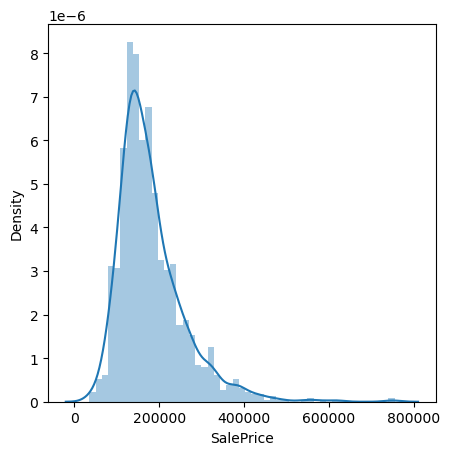

In [6]:
plt.figure(figsize = (5,5), dpi = 100)
sns.distplot(train['SalePrice'])
plt.show()

# Missing value

In [7]:
train_n_of_isnull = train.isnull().sum().sort_values(ascending = False)
train_n_of_isnull[:20] # train_x의 결측값 개수를 내림차순으로 확인

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [8]:
test_n_of_isnull = test.isnull().sum().sort_values(ascending = False)
test_n_of_isnull[:34] # test의 결측값 개수를 내림차순으로 확인

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
HouseStyle         0
dtype: int64

In [9]:
# 결측값의 비율이 큰 피쳐는 삭제
# ID 열도 삭제

train = train.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1)
test = test.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1)

In [10]:
train_null_feature = ['LotFrontage', 'GarageCond', 'GarageQual', 'GarageYrBlt', 'GarageFinish', 'GarageType'
                      , 'BsmtCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'
                      , 'MasVnrType', 'MasVnrArea', 'Electrical']

test_null_feature = ['LotFrontage', 'GarageCond', 'GarageQual', 'GarageYrBlt', 'GarageFinish', 'GarageType'
                      , 'BsmtCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'
                      , 'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtHalfBath', 'Functional'
                     ,'BsmtFullBath', 'Utilities', 'Exterior2nd', 'Exterior1st'
                    , 'BsmtFinSF2', 'BsmtFinSF1', 'Exterior2nd', 'BsmtUnfSF', 'TotalBsmtSF',
                    'SaleType', 'Exterior1st', 'KitchenQual', 'GarageArea', 'GarageCars']

In [11]:
# 나머지 피쳐들의 결측값은 최빈값 혹은 중앙값으로 대체
for i in train_null_feature:
    if train[i].dtype == 'object':
        train[i] = train[i].fillna(train[i].mode()[0])
    elif train[i].dtype == 'int64':
        train[i] = train[i].fillna(int(train[i].median()))
    elif train[i].dtype == 'float64':
        train[i] = train[i].fillna(train[i].median())

for i in test_null_feature:
    if test[i].dtype == 'object':
        test[i] = test[i].fillna(train[i].mode()[0])
    elif test[i].dtype == 'int64':
        test[i] = test[i].fillna(int(train[i].median()))
    elif test[i].dtype == 'float64':
        test[i] = test[i].fillna(train[i].median())

In [12]:
train.shape, test.shape

((1460, 75), (1459, 74))

# Outlier

In [13]:
# feature 분리
feature = list(train.columns)
numeric_feature = []
categorical_feature = []
for i in feature:
    if train[i].dtype == 'int64' or train[i].dtype == 'float64':
        numeric_feature.append(i)
    else:
        categorical_feature.append(i)

len(numeric_feature), len(categorical_feature)

(37, 38)

In [14]:
plt.figure(figsize = (30,30), dpi = 300)

for i, col in enumerate(numeric_feature[:-1]):
    plt.subplot(6, 6, i+1)
    plt.scatter(train[col], train['SalePrice'])
    plt.title(col)

plt.show()

In [15]:
# 플롯을 보고 직접 이상치 제거

train = train[(train['LotFrontage'] < 250) & (train['SalePrice'] < 500000)]
train = train[(train['LotArea'] < 100000) & (train['SalePrice'] < 500000)]
train = train.drop(train[(train['YearBuilt'] < 1950) & (train['SalePrice'] > 300000)].index)
train = train.drop(train[(train['YearRemodAdd'] < 1990) & (train['SalePrice'] > 300000)].index)
train = train[(train['MasVnrArea'] < 1300) & (train['SalePrice'] < 500000)]
train = train[(train['BsmtFinSF1'] < 3000) & (train['SalePrice'] < 500000)]
train = train[(train['BsmtFinSF2'] < 1250) & (train['SalePrice'] < 500000)]
train = train[(train['TotalBsmtSF'] < 5000) & (train['SalePrice'] < 500000)]
train = train[(train['1stFlrSF'] < 4000) & (train['SalePrice'] < 500000)]
train = train[(train['GrLivArea'] < 4000) & (train['SalePrice'] < 500000)]
train = train[(train['GarageArea'] < 1250) & (train['SalePrice'] < 500000)]
train = train[(train['WoodDeckSF'] < 600) & (train['SalePrice'] < 500000)]
train = train[(train['OpenPorchSF'] < 400) & (train['SalePrice'] < 500000)]
train = train[(train['EnclosedPorch'] < 400) & (train['SalePrice'] < 500000)]

# Feature Engineering

# Numeric feature

In [16]:
# numeric_feature중에서 특정 값의 개수가 많은 피쳐들
print('BsmtFinSF2', len(train[train['BsmtFinSF2'] == 0]))
print('2ndFlrSF', len(train[train['2ndFlrSF'] == 0]))
print('LowQualFinSF', len(train[train['LowQualFinSF'] == 0]))
print('BsmtHalfBath', len(train[train['BsmtHalfBath'] == 0]))
print('KitchenAbvGr', len(train[train['KitchenAbvGr'] == 1]))
print('GarageArea', len(train[train['GarageArea'] == 0]))
print('WoodDeckSF', len(train[train['WoodDeckSF'] == 0]))
print('OpenPorchSF', len(train[train['OpenPorchSF'] == 0]))
print('EnclosedPorch', len(train[train['EnclosedPorch'] == 0]))
print('3SsnPorch', len(train[train['3SsnPorch'] == 0]))
print('ScreenPorch', len(train[train['ScreenPorch'] == 0]))
print('PoolArea', len(train[train['PoolArea'] == 0]))
print('MiscVal', len(train[train['MiscVal'] == 0]))

BsmtFinSF2 1265
2ndFlrSF 817
LowQualFinSF 1401
BsmtHalfBath 1347
KitchenAbvGr 1357
GarageArea 80
WoodDeckSF 745
OpenPorchSF 651
EnclosedPorch 1220
3SsnPorch 1401
ScreenPorch 1316
PoolArea 1421
MiscVal 1377


In [17]:
# numeric_feature 에서 특정 값의 개수가 1000개가 넘어가는 피쳐들은 모두 삭제

train = train.drop(['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr',
                   'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis = 1)

test = test.drop(['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr',
                   'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis = 1)

In [18]:
# 2ndFlrSF, WoodDeckSF, OpenPorchSF 처리

train['2ndFlrSF'] = train['2ndFlrSF'].replace(0, np.NaN)
train['WoodDeckSF'] = train['WoodDeckSF'].replace(0, np.NaN)
train['OpenPorchSF'] = train['OpenPorchSF'].replace(0, np.NaN)

train['2ndFlrSF'] = train['2ndFlrSF'].fillna(train['2ndFlrSF'].mean())
train['WoodDeckSF'] = train['WoodDeckSF'].fillna(train['WoodDeckSF'].mean())
train['OpenPorchSF'] = train['OpenPorchSF'].fillna(train['OpenPorchSF'].mean())

# Categorical feature

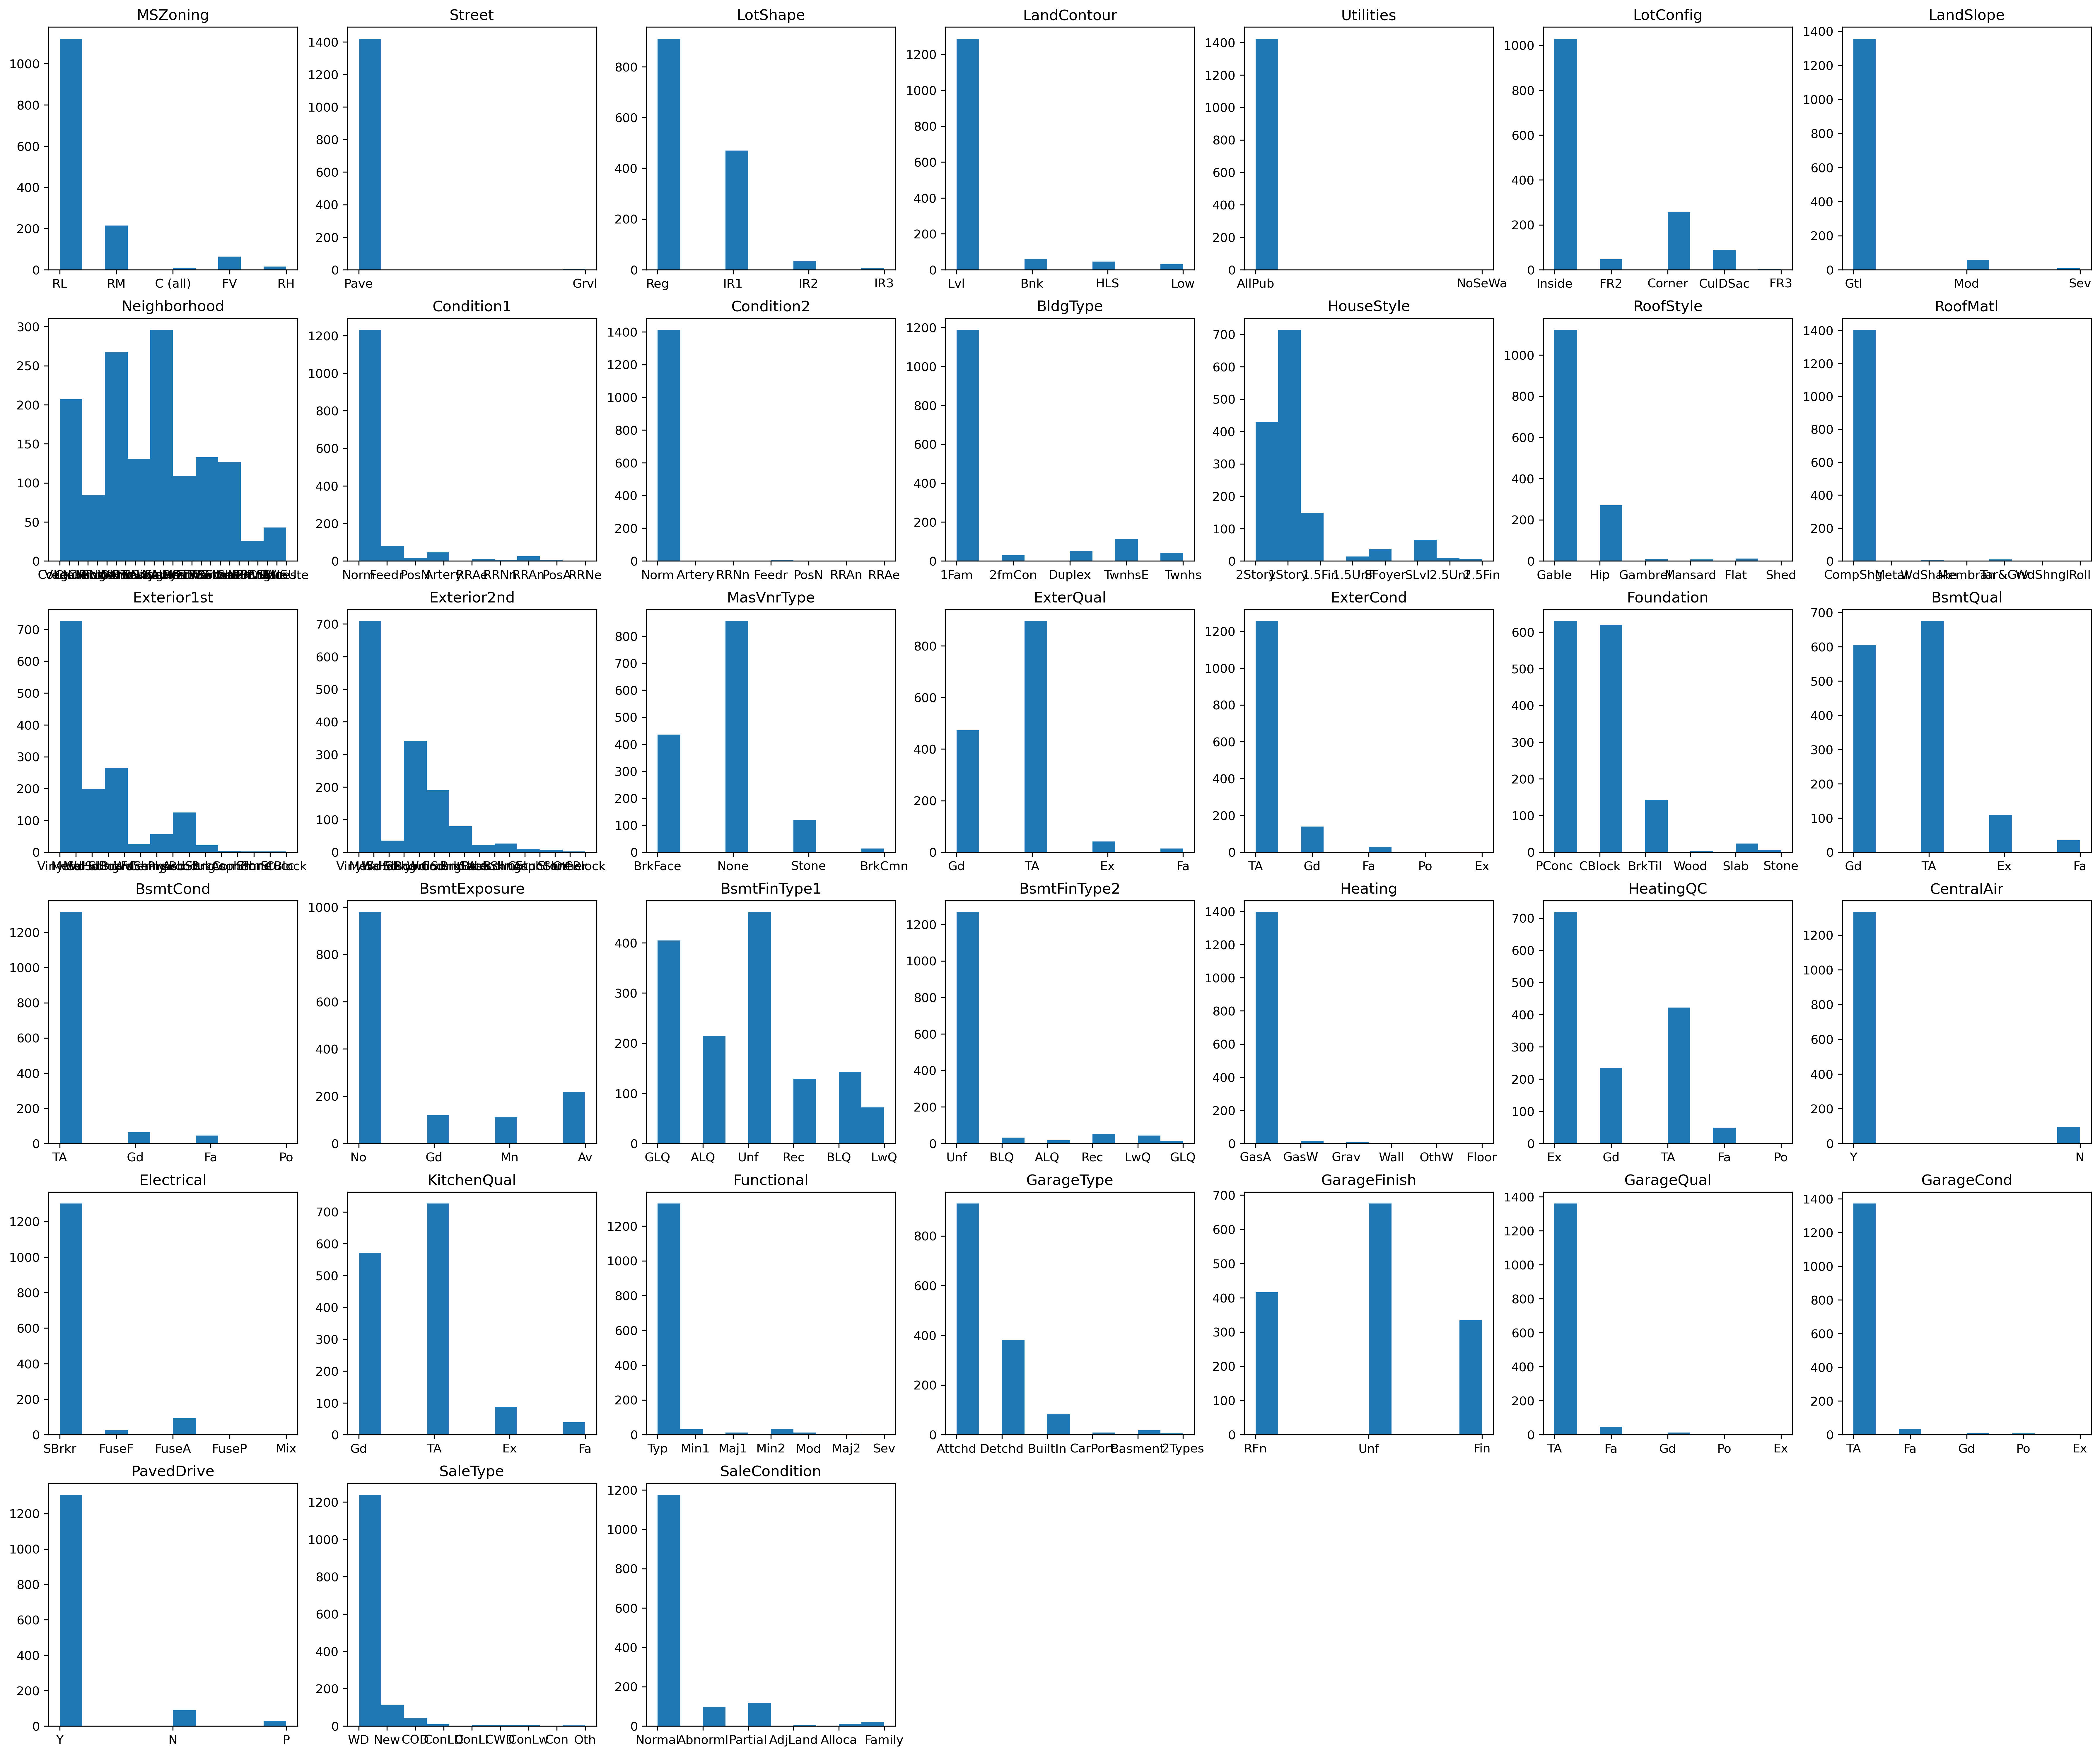

In [19]:
plt.figure(figsize = (30,30), dpi = 300)

for i, col in enumerate(categorical_feature):
    plt.subplot(7, 7, i+1)
    plt.hist(train[col])
    plt.title(col)

plt.show()

In [20]:
# 특정 값이 지나치게 많은 feature는 삭제
# 하나의 값이 1200개가 넘어가는 피쳐는 삭제
# Street, LandContour, Utilities, LandSlope, Condition1, Condition2, RoofMatl, BsmtCond, BsmtFinType2, Heating
# CentralAir, Electrical, Functional, GarageQual, GarageCond, PavedDrive

train = train.drop(['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl',
                   'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical','Functional', 'GarageQual',
                   'GarageCond', 'PavedDrive'], axis = 1)

test = test.drop(['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl',
                   'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical','Functional', 'GarageQual',
                   'GarageCond', 'PavedDrive'], axis = 1)

# Onehot encoding

In [21]:
train = train.reset_index(drop = True)

In [22]:
new_feature = list(train.columns)
new_numeric_feature = []
new_categorical_feature = []
for i in new_feature:
    if train[i].dtype == 'int64' or train[i].dtype == 'float64':
        new_numeric_feature.append(i)
    else:
        new_categorical_feature.append(i)

len(new_numeric_feature), len(new_categorical_feature)

(28, 22)

In [23]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop = 'first')
ohe.fit(train[new_categorical_feature])

train_onehot = pd.DataFrame(ohe.transform(train[new_categorical_feature]).toarray())
test_onehot = pd.DataFrame(ohe.transform(test[new_categorical_feature]).toarray())

train = pd.concat([train, train_onehot], axis = 1)
test = pd.concat([test, test_onehot], axis = 1)

train = train.drop(new_categorical_feature, axis = 1) 
test = test.drop(new_categorical_feature, axis = 1)

# Scaling

In [24]:
# feature와 target 분리

train_x = train.drop(['SalePrice'], axis = 1)
train_y = train['SalePrice']

In [25]:
train_x.shape, train_y.shape, test.shape

((1425, 160), (1425,), (1459, 160))

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_x)

train_x = scaler.transform(train_x)
test = scaler.transform(test)

In [27]:
# target 값 로그변환
train_y = np.log1p(train_y)

# Modeling

In [28]:
from sklearn.ensemble import RandomForestRegressor # RandomForest
from sklearn.ensemble import AdaBoostRegressor # AdaBoost
from xgboost import XGBRegressor # XGBoost
from lightgbm import LGBMRegressor # LightGBM
from catboost import CatBoostRegressor # CatBoost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor

In [31]:
# ElasticNet
from sklearn.linear_model import ElasticNet

params = {'max_iter' : [1,5,10,50,100,300,500,1000],
         'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
          'l1_ratio' : [0, 0.3, 0.5, 0.7, 1]
         }

en_reg = ElasticNet(random_state=0)
grid_en = GridSearchCV(en_reg, scoring = 'neg_mean_absolute_error', param_grid = params, cv=5, refit = True)
grid_en.fit(train_x, train_y)

print('best parameters : ', grid_en.best_params_)
print('best score : ', grid_en.best_score_)

best parameters :  {'alpha': 0.0001, 'l1_ratio': 1, 'max_iter': 300}
best score :  -0.08103327946926654


In [32]:
# RandomForestRegressor
params = {'n_estimators' : [10,50,100,200,500],
         'max_depth' : [3,5,6,7,8,9,10]
         }

rf_reg = RandomForestRegressor()
grid_rf = GridSearchCV(rf_reg, scoring = 'neg_mean_absolute_error', param_grid = params, cv=5, refit = True)
grid_rf.fit(train_x, train_y)

print('best parameters : ', grid_rf.best_params_)
print('best score : ', grid_rf.best_score_)

best parameters :  {'max_depth': 10, 'n_estimators': 200}
best score :  -0.09396450078713083


In [33]:
# LGBMRegressor
params = {'learning_rate' : [0.1, 0.01],
          'n_estimators' : [10,50,100,200,500],
          'max_depth' : [3,5,6,7,8,9,10]
         }

lgbm_reg = LGBMRegressor()
grid_lgbm = GridSearchCV(lgbm_reg, scoring = 'neg_mean_absolute_error', param_grid = params, cv=5, refit = True)
grid_lgbm.fit(train_x, train_y)

print('best parameters : ', grid_lgbm.best_params_)
print('best score : ', grid_lgbm.best_score_)

best parameters :  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
best score :  -0.08203454134751982


In [34]:
# XGBRegressor
params = {'learning_rate' : [0.1, 0.01],
          'n_estimators' : [10,50,100,200,500],
        'max_depth' : [3,5,6,7,8,9,10]
         }

xgb_reg = XGBRegressor()
grid_xgb = GridSearchCV(xgb_reg, scoring = 'neg_mean_absolute_error', param_grid = params, cv=5, refit = True)
grid_xgb.fit(train_x, train_y)

print('best parameters : ', grid_xgb.best_params_)
print('best score : ', grid_xgb.best_score_)

best parameters :  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
best score :  -0.0830079689738279


In [35]:
print('grid_en parameters : ', grid_en.best_params_)
print('grid_rf parameters : ', grid_rf.best_params_)
print('grid_lgbm parameters : ', grid_lgbm.best_params_)
print('grid_xgb parameters : ', grid_xgb.best_params_)

grid_en parameters :  {'alpha': 0.0001, 'l1_ratio': 1, 'max_iter': 300}
grid_rf parameters :  {'max_depth': 10, 'n_estimators': 200}
grid_lgbm parameters :  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
grid_xgb parameters :  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}


In [36]:
print('grid_en score : ', grid_en.best_score_)
print('grid_rf score : ', grid_rf.best_score_)
print('grid_lgbm score : ', grid_lgbm.best_score_)
print('grid_xgb score : ', grid_xgb.best_score_)

grid_en score :  -0.08103327946926654
grid_rf score :  -0.09396450078713083
grid_lgbm score :  -0.08203454134751982
grid_xgb score :  -0.0830079689738279


In [37]:
en_reg = ElasticNet(random_state=0, alpha = 0.0001, l1_ratio = 1, max_iter = 300)
rf_reg = RandomForestRegressor(max_depth = 10, n_estimators = 20)
lgbm_reg = LGBMRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 200)
xgb_reg = XGBRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 500, verbosity = 0, silent = False)

In [38]:
voting_model = VotingRegressor(estimators=[
    ('EN', en_reg),
    ('RF', rf_reg),
    ('LGBM', lgbm_reg),
    ('XGB', xgb_reg)] )

voting_model.fit(train_x, train_y)
pred = voting_model.predict(test)

In [39]:
submission['SalePrice'] = 0
submission['SalePrice'] = np.expm1(pred)

In [40]:
submission

,Id,SalePrice
0,1461,116932.985124
1,1462,149682.698557
2,1463,180442.110908
3,1464,188219.223282
4,1465,181019.118429
...,...,...
1454,2915,78953.545890
1455,2916,77650.786664
1456,2917,153419.106815
1457,2918,112987.434801


In [41]:
submission.to_csv('my_house_submission.csv', index=False)